In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# utils

def f(x):
    return np.exp(x) -x + 1

def u_exacte(x):
    return -np.exp(x) + ((x**3)/6) - ((x**2)/2) + (x*(np.exp(1) - (2/3))  + 1)

In [11]:
# Longeur de la barre
L = 1 
# Nombre de neuds
N = 20
# Pas du maillage
dx = L / (N-1)
# Maillage de la barre
x = np.linspace(0, L, N)

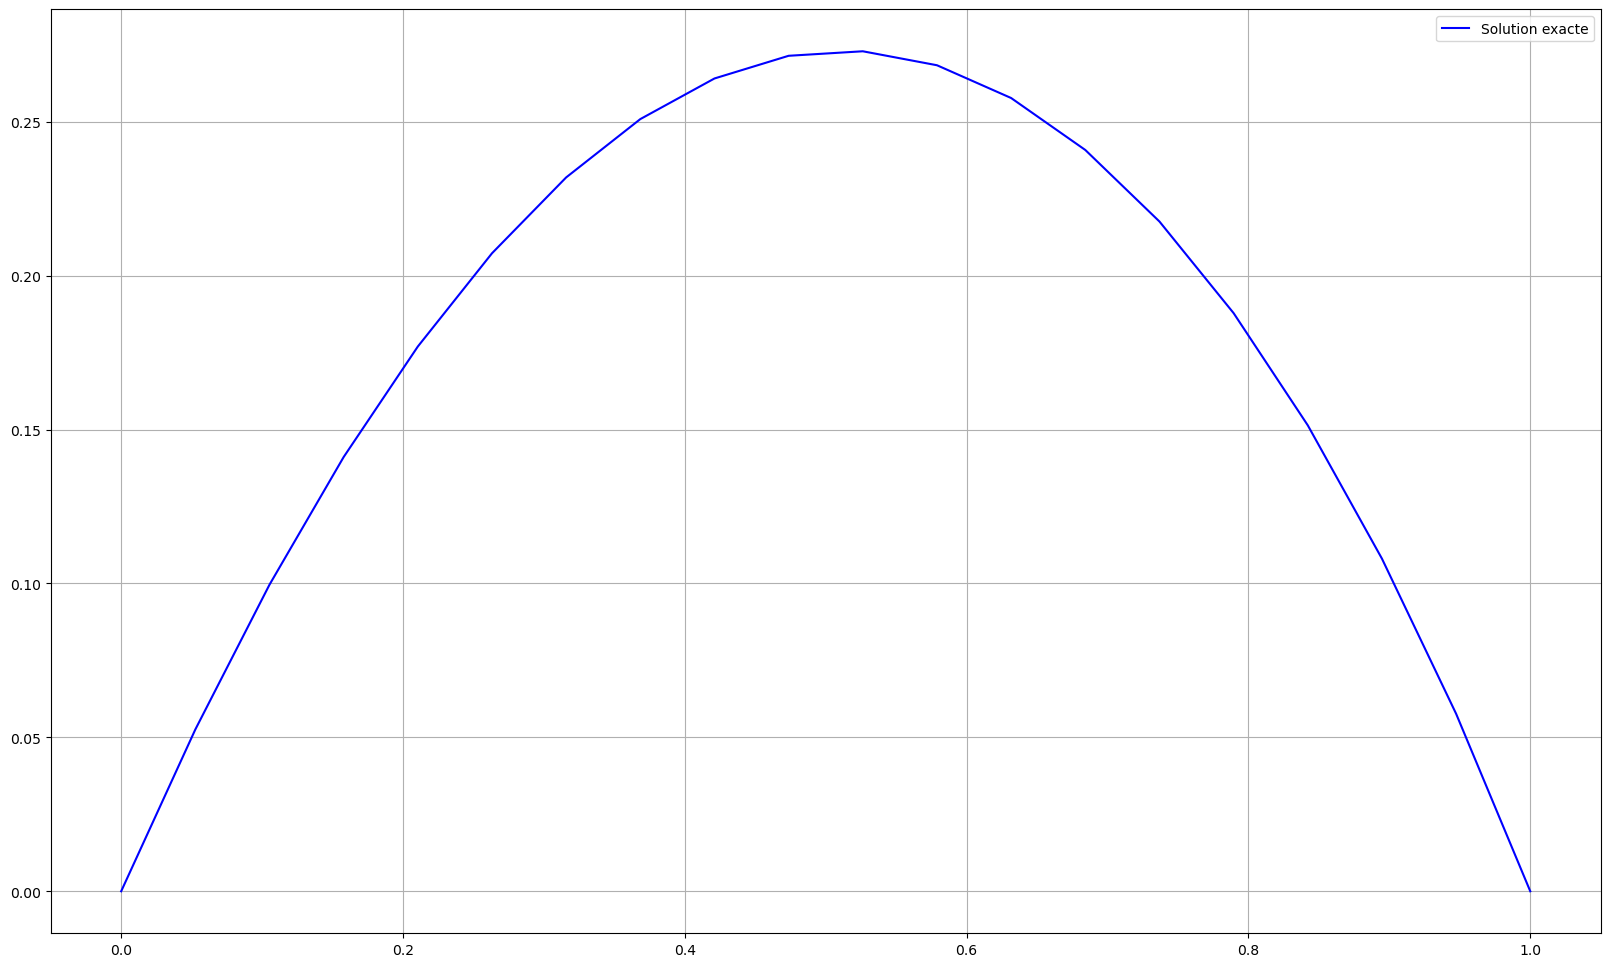

In [20]:
# SOLUTION EXACTE

def plot_solution_exacte():
    uex = [u_exacte(e) for e in x]
    plt.figure(figsize=(20,12))
    plt.plot(x, uex, "-b", label="Solution exacte")
    plt.legend(loc='upper right')
    plt.grid()
plot_solution_exacte()

In [21]:
# SOLUTION APPROCHÉE PAR DIFFERENCE FINES

# Dimension de la matrice
M = N - 2

# Initalisation de la matrice [[ (-1/dx^2).A.U = b ]]
# A
A = np.zeros((M, M))
A = -2*np.eye(M) + np.diag(np.ones(M-1),1) + np.diag(np.ones(M-1),-1)
A = (-1/(dx**2)) * A
# B
b = np.array(f(x)[1:-1])

In [22]:
from lab_utils import gauss_pivot_v2

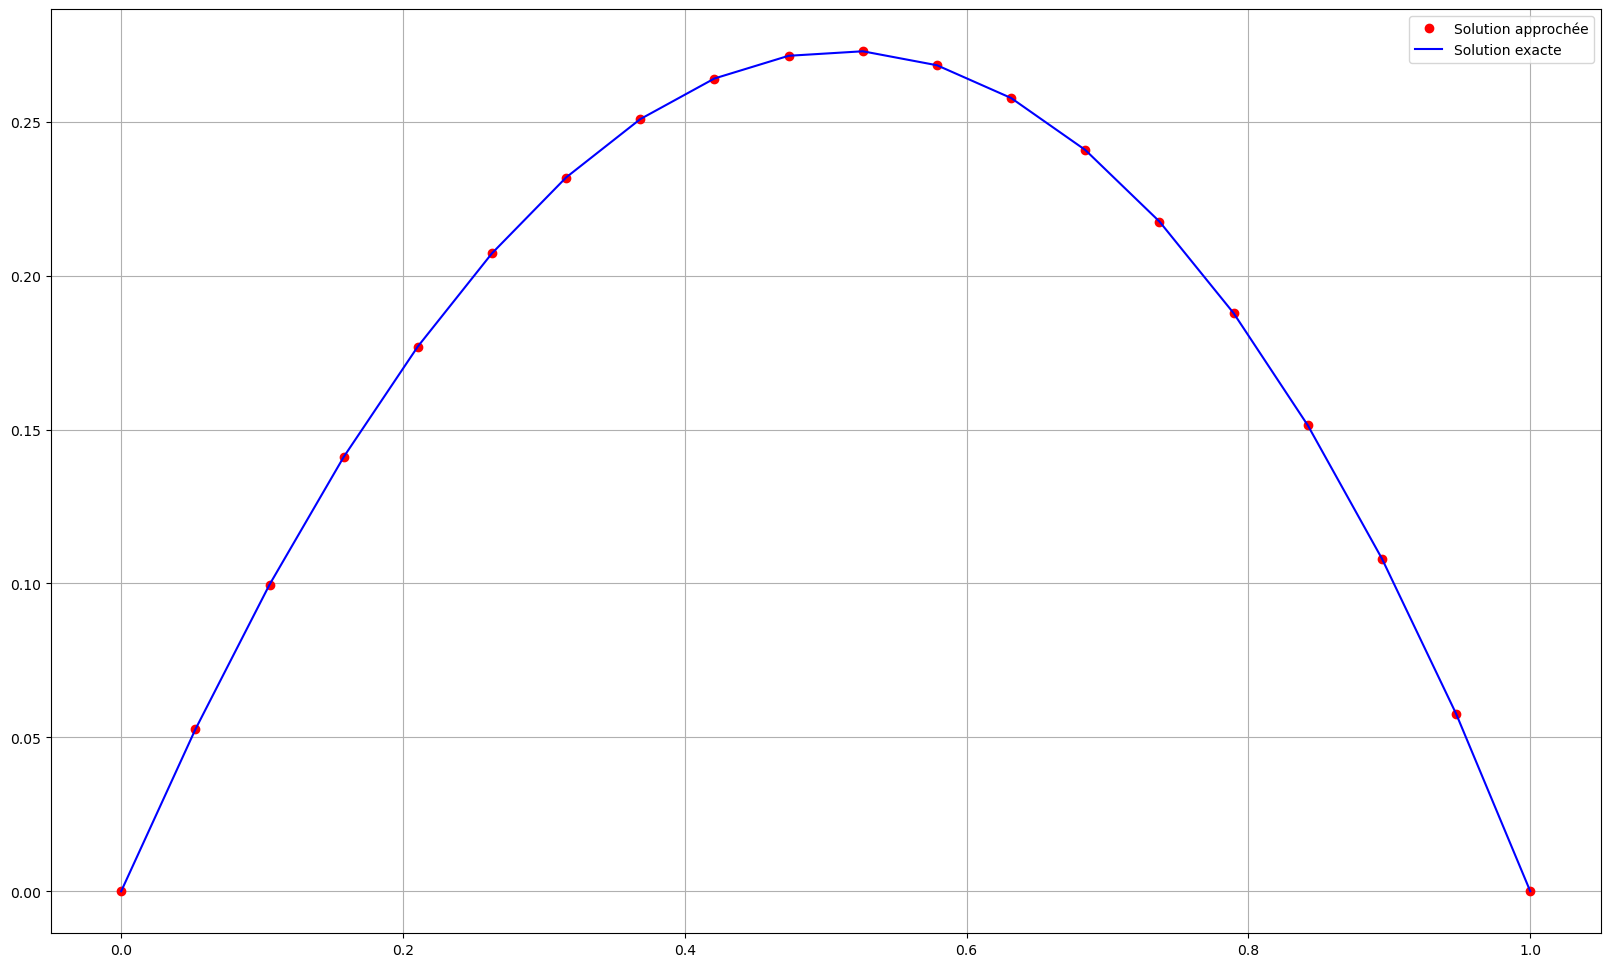

In [24]:
# Solve using np or custom gauss solver wroten in gauss.ipynb file
#u = np.linalg.solve(A, b)
u = gauss_pivot_v2(A,  b)

# Solution
u_num = np.zeros(N)
u_num[0] = 0
u_num[-1] = 0
for i in range(1, N-1):
    u_num[i] = u[i-1]
    
# Plot solution numeric
plt.figure(figsize=(20,12))
plt.plot(x, u_num, "or", label="Solution approchée")

# Plot exacte in same figure
uex = [u_exacte(e) for e in x]
plt.plot(x, uex, "-b", label="Solution exacte")

plt.legend(loc='upper right')
plt.grid()

La précision de cette methode est due a l'adre de precision de nos calculs. Ordre 2.